In [184]:
import os
import pandas as pd

df_gg = pd.read_csv('data/transformed/gg_piv.csv')
df_oscar = pd.read_csv('data/transformed/oscar_piv.csv')
df_sag = pd.read_csv('data/transformed/sag_piv.csv')

In [185]:
df_gg = df_gg.replace({True: 1, False: 0})
df_oscar = df_oscar.replace({True: 1, False: 0})
df_sag = df_sag.replace({True: 1, False: 0})
df_gg

C:\Users\kamil\AppData\Local\Temp\ipykernel_2304\3154665422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gg = df_gg.replace({True: 1, False: 0})
C:\Users\kamil\AppData\Local\Temp\ipykernel_2304\3154665422.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_oscar = df_oscar.replace({True: 1, False: 0})
C:\Users\kamil\AppData\Local\Temp\ipykernel_2304\3154665422.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resul

,nome,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_gg,ganhou_gg
0,Alicia Vikander,0,1,0,0,0,0,0,0,0,0,0,1,0
1,Amy Adams,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Ana de Armas,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Andra Day,0,0,0,0,0,0,1,0,0,0,0,1,1
4,Angelina Jolie,0,0,0,0,0,0,0,0,0,0,1,1,0
5,Annette Bening,0,0,0,0,0,0,0,0,0,1,0,1,0
6,Brie Larson,0,1,0,0,0,0,0,0,0,0,0,1,1
7,Cailee Spaeny,0,0,0,0,0,0,0,0,0,1,0,1,0
8,Carey Mulligan,0,0,0,0,0,0,1,0,0,1,0,1,0
9,Cate Blanchett,0,1,0,0,0,0,0,0,1,0,0,1,1


In [186]:
print(f"df_gg tem {df_gg.shape[0]} linhas")
print(f"df_oscar tem {df_oscar.shape[0]} linhas")
print(f"df_sag tem {df_sag.shape[0]} linhas")

df_gg tem 44 linhas
df_oscar tem 46 linhas
df_sag tem 43 linhas


In [187]:
ganhou_gg_count = df_gg['ganhou_gg'].sum()
ganhou_oscar_count = df_oscar['ganhou_os'].sum()
ganhou_sag_count = df_sag['ganhou_sag'].sum()

print(f"Quantidade de 'ganhou_gg' True: {ganhou_gg_count}")
print(f"Quantidade de 'ganhou_os' True: {ganhou_oscar_count}")
print(f"Quantidade de 'ganhou_sag' True: {ganhou_sag_count}")

Quantidade de 'ganhou_gg' True: 11
Quantidade de 'ganhou_os' True: 8
Quantidade de 'ganhou_sag' True: 11


In [188]:
dfs_juntos = pd.concat([df_gg, df_oscar, df_sag])

dfs_juntos = dfs_juntos.groupby('nome').sum().reset_index()

dfs_juntos = dfs_juntos.fillna(0)

dfs_juntos

,nome,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_gg,ganhou_gg,indicada_os,ganhou_os,indicada_sag,ganhou_sag
0,Alicia Vikander,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,Amy Adams,0,0,2,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
2,Ana de Armas,0,0,0,0,0,0,0,0,3,0,0,1.0,0.0,1.0,0.0,1.0,0.0
3,Andra Day,0,0,0,0,0,0,2,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
4,Andrea Riseborough,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Scarlett Johansson,0,0,0,0,0,3,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
59,Tilda Swinton,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
60,Vanessa Kirby,0,0,0,0,0,0,3,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
61,Viola Davis,0,0,0,0,0,0,3,0,2,0,0,1.0,0.0,1.0,0.0,1.0,1.0


In [189]:
dfs_juntos = dfs_juntos.drop(columns=['indicada_os'])

ganhou_os = dfs_juntos.pop('ganhou_os')
dfs_juntos['ganhou_os'] = ganhou_os

dfs_juntos

,nome,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,ganhou_os
0,Alicia Vikander,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,Amy Adams,0,0,2,0,0,0,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0
2,Ana de Armas,0,0,0,0,0,0,0,0,3,0,0,1.0,0.0,1.0,0.0,0.0
3,Andra Day,0,0,0,0,0,0,2,0,0,0,0,1.0,1.0,0.0,0.0,0.0
4,Andrea Riseborough,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Scarlett Johansson,0,0,0,0,0,3,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0
59,Tilda Swinton,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
60,Vanessa Kirby,0,0,0,0,0,0,3,0,0,0,0,1.0,0.0,1.0,0.0,0.0
61,Viola Davis,0,0,0,0,0,0,3,0,2,0,0,1.0,0.0,1.0,1.0,0.0


In [190]:
matriz_correlacao = dfs_juntos.drop(columns=['nome']).corr()
matriz_correlacao

,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,ganhou_os
participou_2014,1.000000,-0.107611,-0.111465,-0.107611,-0.016661,-0.095420,-0.095420,-0.100967,-0.107611,-0.106890,-0.127274,0.158117,0.020665,0.166428,0.020665,0.067741
participou_2015,-0.107611,1.000000,-0.125706,0.082524,-0.117434,0.073175,-0.107611,-0.113867,0.184466,-0.120546,-0.143534,0.026507,0.206836,0.038013,0.023305,0.076396
participou_2016,-0.111465,-0.125706,1.000000,0.050282,-0.087581,-0.111465,-0.049045,-0.018871,-0.125706,0.006243,-0.148675,0.079872,-0.039228,0.039375,0.024140,0.079132
participou_2017,-0.107611,0.082524,0.050282,1.000000,-0.117434,0.012913,0.163568,-0.018219,-0.053398,-0.057259,-0.143534,0.077110,0.023305,0.187691,0.084482,0.146148
participou_2018,-0.016661,-0.117434,-0.087581,-0.117434,1.000000,-0.104131,-0.104131,0.352591,-0.051671,-0.116647,-0.102433,0.123584,0.081750,0.181621,0.022552,0.006428
participou_2019,-0.095420,0.073175,-0.111465,0.012913,-0.104131,1.000000,-0.095420,-0.100967,-0.107611,-0.106890,0.073182,0.158117,0.020665,0.210669,0.020665,0.067741
participou_2020,-0.095420,-0.107611,-0.049045,0.163568,-0.104131,-0.095420,1.000000,-0.100967,0.073175,0.145637,-0.127274,0.202988,0.129158,0.122188,0.183404,0.067741
participou_2021,-0.100967,-0.113867,-0.018871,-0.018219,0.352591,-0.100967,-0.100967,1.000000,-0.018219,-0.113104,-0.028618,0.119830,0.021867,0.082479,0.021867,0.268018
participou_2022,-0.107611,0.184466,-0.125706,-0.053398,-0.051671,-0.107611,0.073175,-0.018219,1.000000,-0.120546,-0.143534,0.026507,0.023305,0.087906,0.084482,0.076396
participou_2023,-0.106890,-0.120546,0.006243,-0.057259,-0.116647,-0.106890,0.145637,-0.113104,-0.120546,1.000000,-0.142572,0.086018,0.011756,0.050148,0.125694,-0.002062


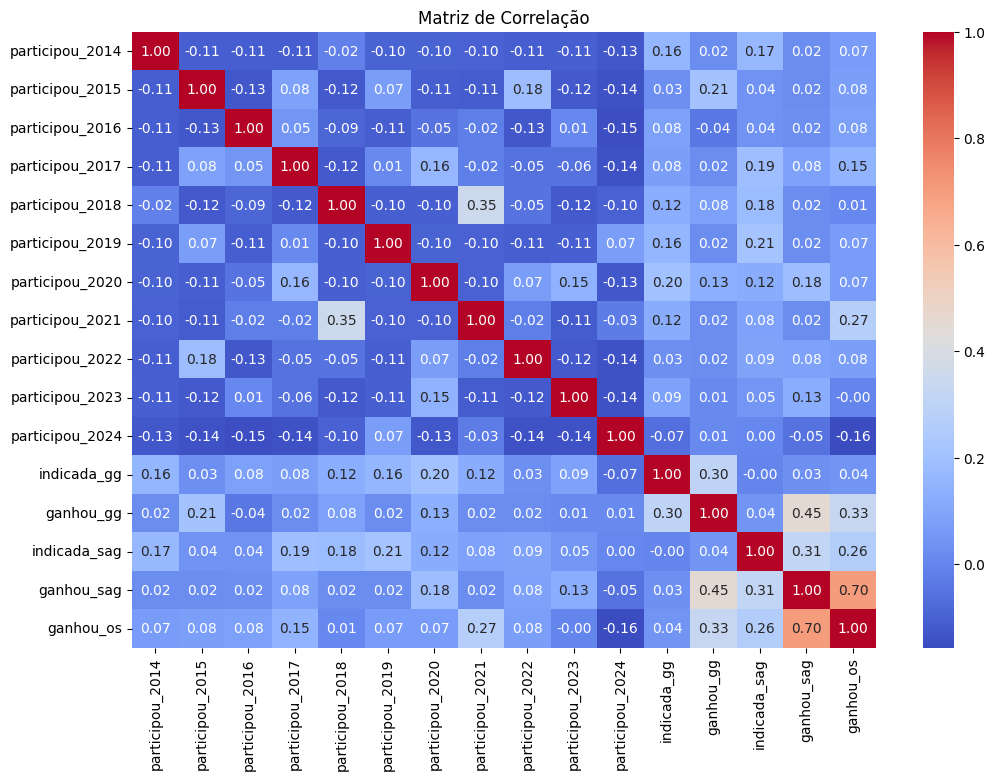

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

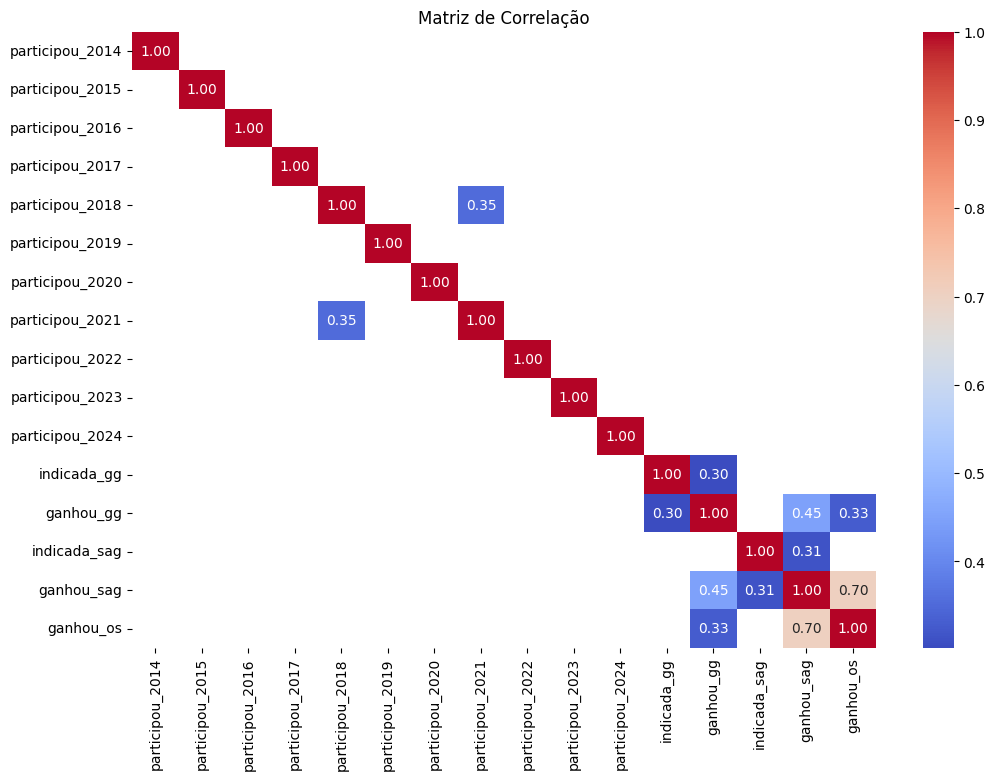

In [192]:
matriz_correlacao_filtrada = matriz_correlacao[matriz_correlacao > 0.3].dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

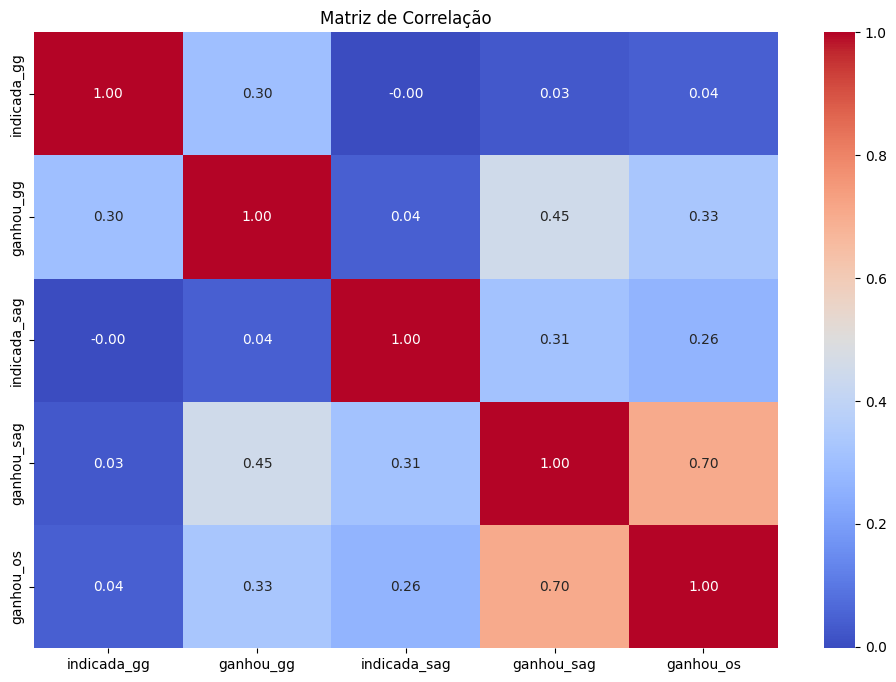

In [193]:
cols_to_drop = [col for col in dfs_juntos.columns if col.startswith('participou_')]
df_maior_corr = dfs_juntos.drop(columns=cols_to_drop)

plt.figure(figsize=(12, 8))
sns.heatmap(df_maior_corr.drop(columns=['nome']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [194]:
df_maior_corr

,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,ganhou_os
0,Alicia Vikander,1.0,0.0,0.0,0.0,0.0
1,Amy Adams,1.0,0.0,1.0,0.0,0.0
2,Ana de Armas,1.0,0.0,1.0,0.0,0.0
3,Andra Day,1.0,1.0,0.0,0.0,0.0
4,Andrea Riseborough,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
58,Scarlett Johansson,1.0,0.0,1.0,0.0,0.0
59,Tilda Swinton,1.0,0.0,0.0,0.0,0.0
60,Vanessa Kirby,1.0,0.0,1.0,0.0,0.0
61,Viola Davis,1.0,0.0,1.0,1.0,0.0


In [195]:
remover = df_oscar[df_oscar['participou_2024'] == 1]
remover

,nome,participou_2014,participou_2015,participou_2016,participou_2017,participou_2018,participou_2019,participou_2020,participou_2021,participou_2022,participou_2023,participou_2024,indicada_os,ganhou_os
9,Cynthia Erivo,0,0,0,0,0,1,0,0,0,0,1,1,0
10,Demi Moore,0,0,0,0,0,0,0,0,0,0,1,1,0
13,Fernanda Torres,0,0,0,0,0,0,0,0,0,0,1,1,0
20,Karla Sofía Gascón,0,0,0,0,0,0,0,0,0,0,1,1,0
30,Mikey Madison,0,0,0,0,0,0,0,0,0,0,1,1,0


In [196]:
#tirando as divas os 2024
df_maior_corr = df_maior_corr[~df_maior_corr['nome'].isin(remover['nome'])].reset_index(drop=True)
df_maior_corr


,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,ganhou_os
0,Alicia Vikander,1.0,0.0,0.0,0.0,0.0
1,Amy Adams,1.0,0.0,1.0,0.0,0.0
2,Ana de Armas,1.0,0.0,1.0,0.0,0.0
3,Andra Day,1.0,1.0,0.0,0.0,0.0
4,Andrea Riseborough,0.0,0.0,0.0,0.0,0.0
5,Angelina Jolie,1.0,0.0,0.0,0.0,0.0
6,Annette Bening,1.0,0.0,1.0,0.0,0.0
7,Brie Larson,1.0,1.0,1.0,1.0,1.0
8,Cailee Spaeny,1.0,0.0,0.0,0.0,0.0
9,Carey Mulligan,1.0,0.0,1.0,0.0,0.0


## Regressão logistica

In [197]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [198]:
df_maior_corr.drop(columns=['nome'], inplace=True)
df_maior_corr

,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,ganhou_os
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0


In [199]:
x = df_maior_corr.drop(columns=['ganhou_os'])
y = df_maior_corr['ganhou_os']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [200]:
rl = LogisticRegression()
rl.fit(x_train, y_train)
y_pred = rl.predict(x_test)

In [ ]:
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.9167
Matriz de Confusão:
[[11  0]
 [ 1  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati